In [1]:
import os
import librosa
import numpy as np
import pandas as pd

In [2]:
# Set the path to the directory containing the audio files
audio_dir = './dataverse_files'

def load_audio_files(directory):
    audio_files = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith('.wav'):
            filepath = os.path.join(directory, filename)
            y, sr = librosa.load(filepath, sr=None)
            emotion = filename.split('_')[2]  # Assuming the emotion is the third part of the filename
            audio_files.append((y, sr))
            labels.append(emotion)
    return audio_files, labels

# Load the audio files and their labels
audio_files, labels = load_audio_files(audio_dir)

In [3]:
# Display the first few loaded files and their labels
for i in range(3):
    print(f"Audio file {i+1}:")
    print(f"  Signal: {audio_files[i][0]}")
    print(f"  Sample rate: {audio_files[i][1]}")
    print(f"  Emotion: {labels[i]}")

Audio file 1:
  Signal: [3.0517578e-04 1.2207031e-04 3.0517578e-05 ... 1.2207031e-04 6.1035156e-05
 0.0000000e+00]
  Sample rate: 24414
  Emotion: angry.wav
Audio file 2:
  Signal: [ 0.0000000e+00 -1.2207031e-04 -9.1552734e-05 ...  6.7138672e-04
  4.8828125e-04  5.7983398e-04]
  Sample rate: 24414
  Emotion: neutral.wav
Audio file 3:
  Signal: [ 0.0000000e+00 -9.1552734e-05 -9.1552734e-05 ... -3.3569336e-04
 -3.0517578e-04 -1.2207031e-04]
  Sample rate: 24414
  Emotion: ps.wav


In [47]:
import librosa
import numpy as np

# Extract MFCCs: overall average, max, and min values
def extract_mfcc(y, sr):
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    avg_mfccs = np.mean(mfccs, axis=1)
    overall_avg_mfcc = np.mean(avg_mfccs)
    max_mfccs = np.max(mfccs, axis=1)
    overall_max_mfcc = np.mean(max_mfccs)
    min_mfccs = np.min(mfccs, axis=1)
    overall_min_mfcc = np.mean(min_mfccs)
    return overall_avg_mfcc, overall_max_mfcc, overall_min_mfcc

# Extract Pitch: overall average, max, and min values
def extract_pitch(y, sr):
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    pitch = [pitches[:, i].max() for i in range(pitches.shape[1])]
    pitch = np.array([p for p in pitch if p > 0])  # Remove zero values
    avg_pitch = np.mean(pitch) if len(pitch) > 0 else 0
    max_pitch = np.max(pitch) if len(pitch) > 0 else 0
    min_pitch = np.min(pitch) if len(pitch) > 0 else 0
    return avg_pitch, max_pitch, min_pitch

# Extract Energy/Intensity
def extract_energy(y):
    rms = librosa.feature.rms(y=y)
    mean_energy = np.mean(rms)
    return mean_energy

# Extract Duration
def extract_duration(y, sr):
    return librosa.get_duration(y=y, sr=sr)


In [57]:
# Import necessary library
import librosa

# Initialize lists to store features
avg_mfcc_features = []
max_mfcc_features = []
min_mfcc_features = []
avg_pitch_features = []
max_pitch_features = []
min_pitch_features = []
energy_features = []
duration_features = []

# Extract and store features for each audio file
for y, sr in audio_files:
    avg_mfcc, max_mfcc, min_mfcc = extract_mfcc(y, sr)
    avg_mfcc_features.append(avg_mfcc)
    max_mfcc_features.append(max_mfcc)
    min_mfcc_features.append(min_mfcc)
    
    avg_pitch, max_pitch, min_pitch = extract_pitch(y, sr)
    avg_pitch_features.append(avg_pitch)
    max_pitch_features.append(max_pitch)
    min_pitch_features.append(min_pitch)
    
    energy_features.append(extract_energy(y))
    duration_features.append(librosa.get_duration(y=y, sr=sr))

# Create a DataFrame
features_df = pd.DataFrame({
    'Avg_MFCCs': avg_mfcc_features,
    'Max_MFCCs': max_mfcc_features,
    'Min_MFCCs': min_mfcc_features,
    'Avg_Pitch': avg_pitch_features,
    'Max_Pitch': max_pitch_features,
    'Min_Pitch': min_pitch_features,
    'Energy': energy_features,
    'Duration': duration_features,
    'Emotion': labels
})

# Display the DataFrame
features_df.head()


,Avg_MFCCs,Max_MFCCs,Min_MFCCs,Avg_Pitch,Max_Pitch,Min_Pitch,Energy,Duration,Emotion
0,-27.953793,37.365513,-103.488678,1832.425903,3985.993896,195.852158,0.039251,2.000451,angry.wav
1,-33.219109,11.911955,-97.044014,1449.045410,3987.052246,186.114929,0.010234,2.052757,neutral.wav
2,-28.494967,26.614315,-104.832436,1568.182007,3992.652832,180.569580,0.026914,2.058040,ps.wav
3,-26.289722,32.884193,-83.902382,1794.889038,3988.344727,199.700089,0.048039,1.745064,fear.wav
4,-34.663815,15.686101,-101.344887,1656.760986,3999.317383,297.126740,0.019980,1.728967,fear.wav


In [58]:
# Filter the DataFrame for each emotion
angry_df = features_df[features_df['Emotion'] == 'angry.wav']
disgust_df = features_df[features_df['Emotion'] == 'disgust.wav']
fear_df = features_df[features_df['Emotion'] == 'fear.wav']
happy_df = features_df[features_df['Emotion'] == 'happy.wav']
neutral_df = features_df[features_df['Emotion'] == 'neutral.wav']
sad_df = features_df[features_df['Emotion'] == 'sad.wav']
surprise_df = features_df[features_df['Emotion'] == 'ps.wav']

# Print a few rows from each DataFrame
print("Angry Emotion:")
print(angry_df.head(), "\n")

print("Disgust Emotion:")
print(disgust_df.head(), "\n")

print("Fear Emotion:")
print(fear_df.head(), "\n")

print("Happy Emotion:")
print(happy_df.head(), "\n")

print("Neutral Emotion:")
print(neutral_df.head(), "\n")

print("Sad Emotion:")
print(sad_df.head(), "\n")

print("Surprise Emotion:")
print(surprise_df.head(), "\n")


Angry Emotion:
    Avg_MFCCs  Max_MFCCs   Min_MFCCs    Avg_Pitch    Max_Pitch   Min_Pitch  \
0  -27.953793  37.365513 -103.488678  1832.425903  3985.993896  195.852158   
8  -28.204710  33.056591 -109.862846  2471.529785  3996.596191  394.137695   
28 -28.280846  32.947605 -104.745895  1666.661133  3995.165039  193.049637   
35 -32.505512  17.717077  -98.809853  1687.896729  3966.830811  359.991394   
40 -31.505816  21.629251  -95.900436  1942.704468  3987.380371  162.779480   

      Energy  Duration    Emotion  
0   0.039251  2.000451  angry.wav  
8   0.043568  2.057959  angry.wav  
28  0.034049  2.009093  angry.wav  
35  0.027943  1.534980  angry.wav  
40  0.037891  1.652535  angry.wav   

Disgust Emotion:
    Avg_MFCCs  Max_MFCCs   Min_MFCCs    Avg_Pitch    Max_Pitch   Min_Pitch  \
7  -29.573957  30.104187 -104.745064  1461.824341  3983.648193  190.624283   
10 -29.805971  30.922771 -107.370239  1971.543579  3999.237061  167.191925   
12 -30.378174  29.629763 -107.173225  1985.6043

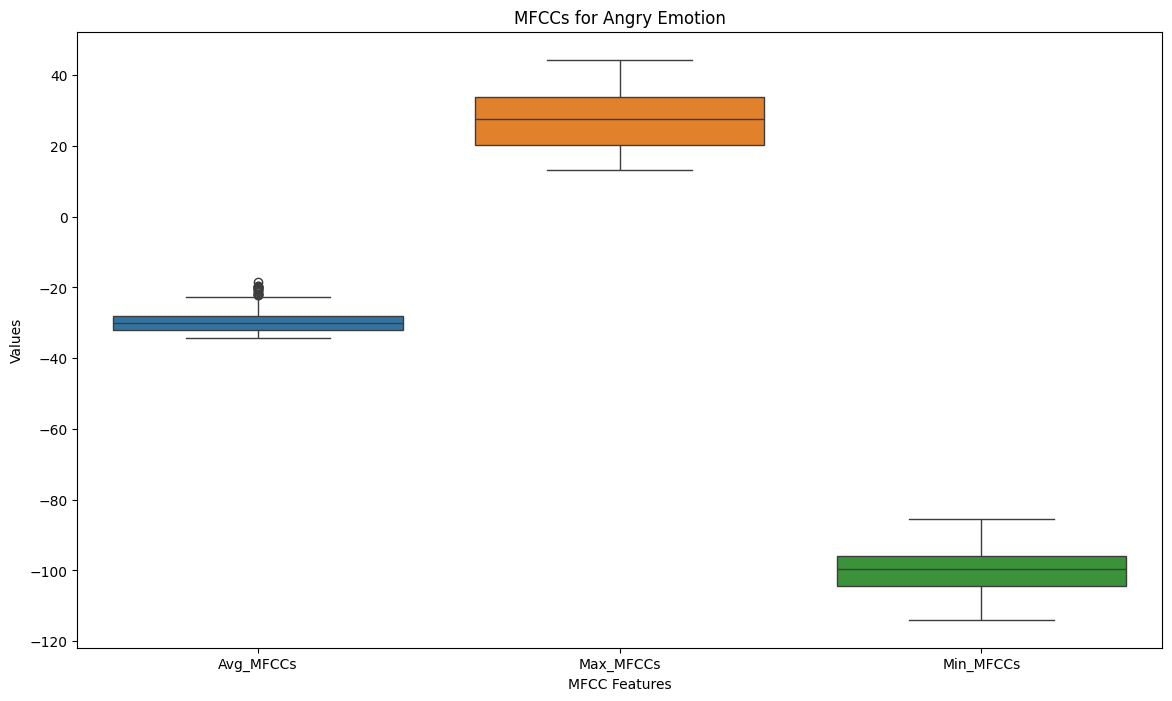

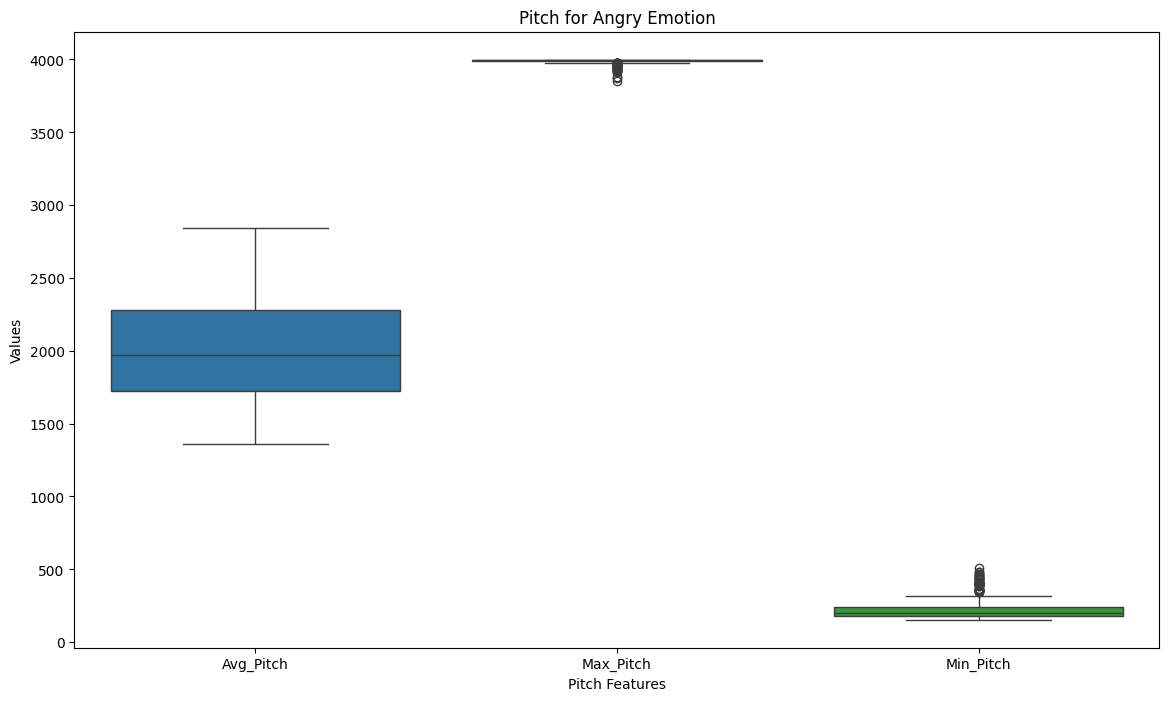

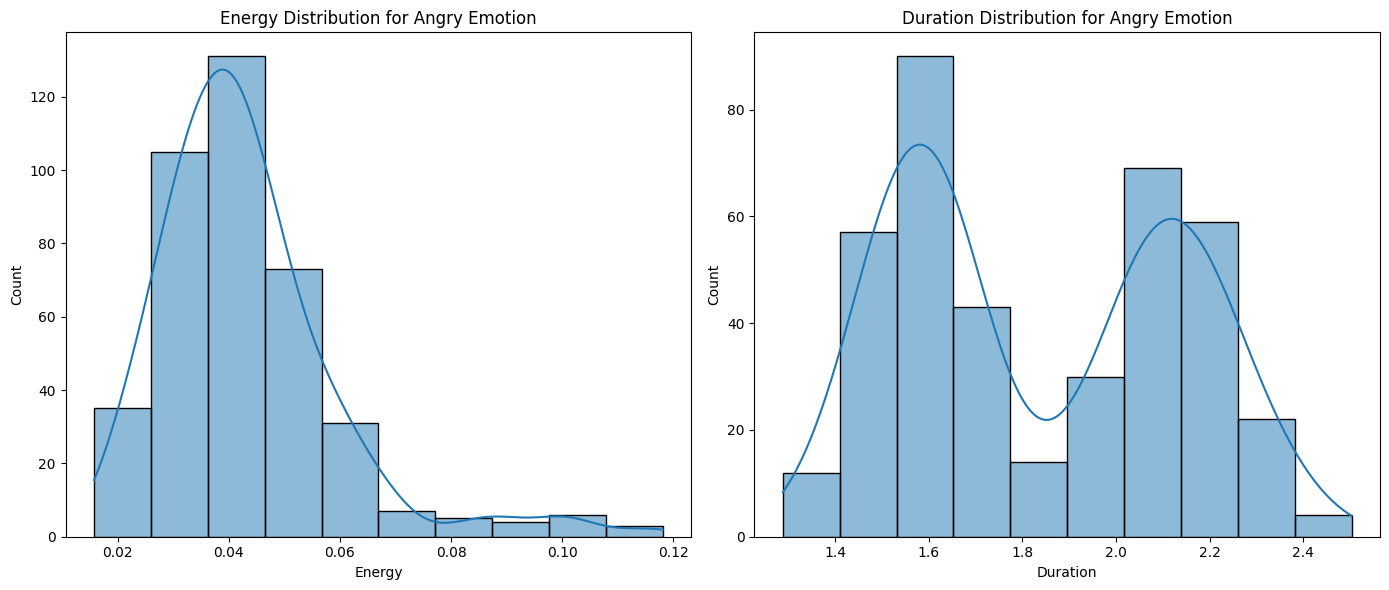

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns


# Visualize MFCCs for Angry Emotion
plt.figure(figsize=(14, 8))
sns.boxplot(data=angry_df[['Avg_MFCCs', 'Max_MFCCs', 'Min_MFCCs']])
plt.title('MFCCs for Angry Emotion')
plt.xlabel('MFCC Features')
plt.ylabel('Values')
plt.show()

# Visualize Pitch for Angry Emotion
plt.figure(figsize=(14, 8))
sns.boxplot(data=angry_df[['Avg_Pitch', 'Max_Pitch', 'Min_Pitch']])
plt.title('Pitch for Angry Emotion')
plt.xlabel('Pitch Features')
plt.ylabel('Values')
plt.show()

# Visualize Energy and Duration for Angry Emotion if there are enough elements
if len(angry_df) > 1:
    plt.figure(figsize=(14, 6))
    
    # Energy
    plt.subplot(1, 2, 1)
    sns.histplot(angry_df['Energy'], bins=10, kde=True)
    plt.title('Energy Distribution for Angry Emotion')

    # Duration
    plt.subplot(1, 2, 2)
    sns.histplot(angry_df['Duration'], bins=10, kde=True)
    plt.title('Duration Distribution for Angry Emotion')

    plt.tight_layout()
    plt.show()
else:
    print("Not enough data points to plot Energy and Duration distributions for Angry Emotion.")


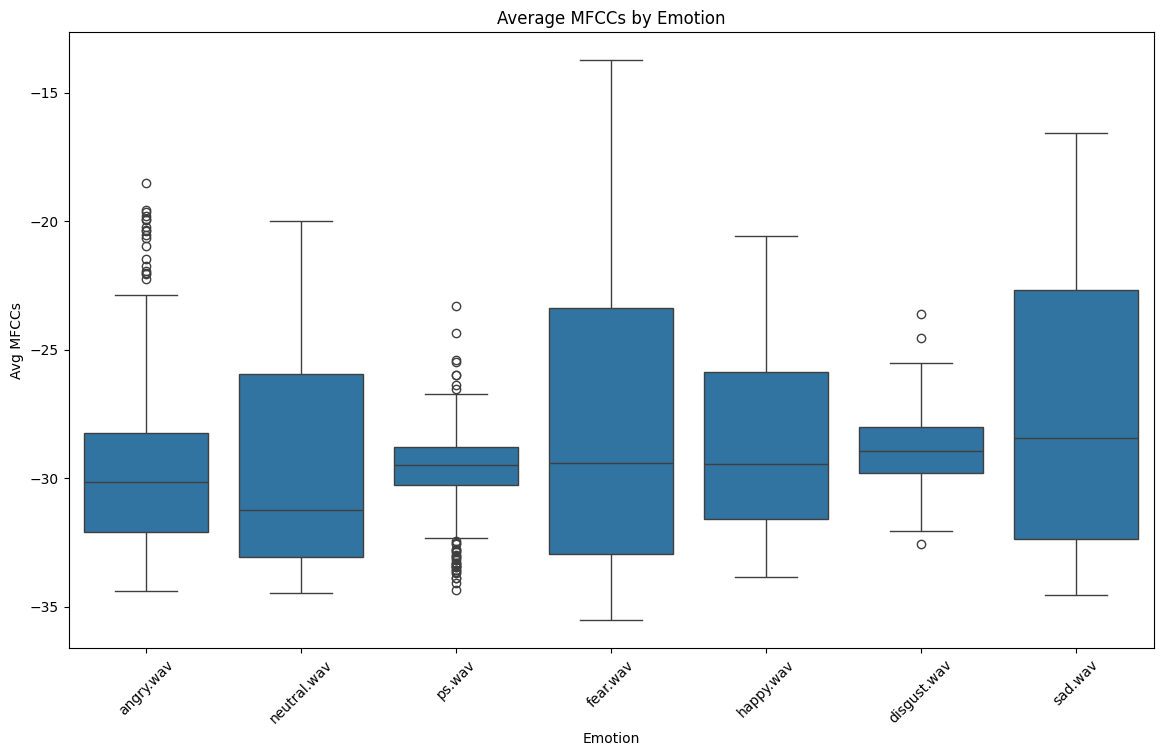

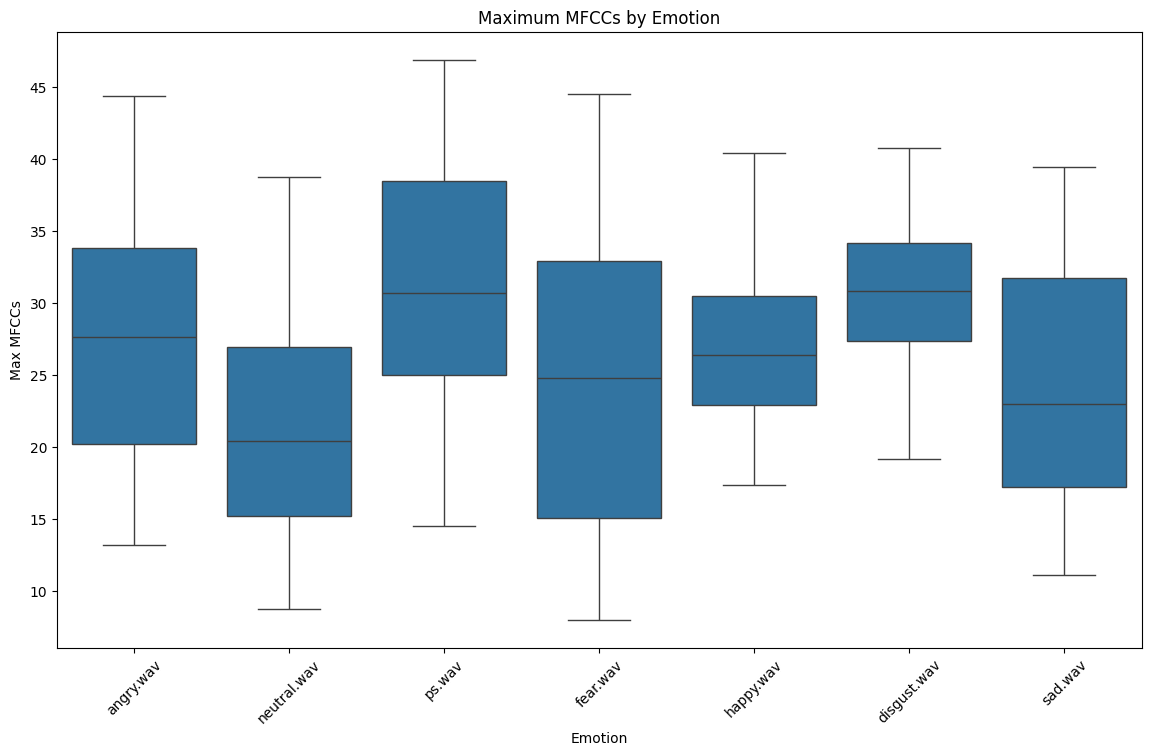

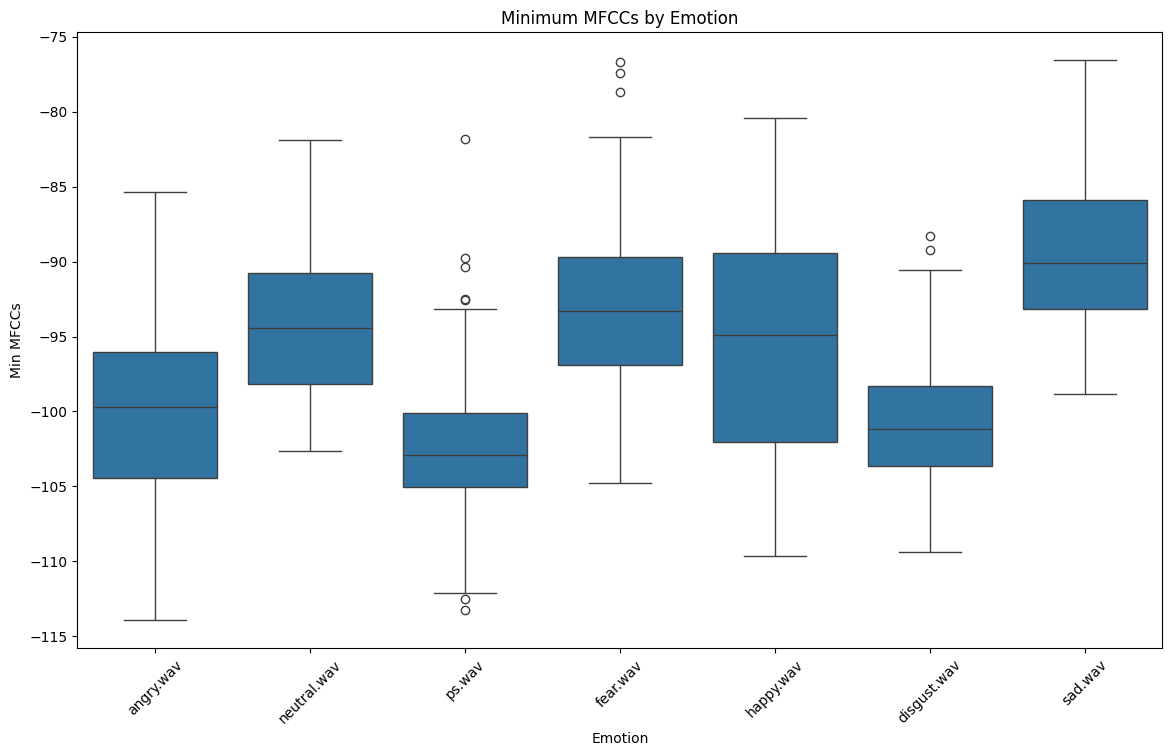

In [62]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Emotion', y='Avg_MFCCs', data=features_df)
plt.title('Average MFCCs by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Avg MFCCs')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='Emotion', y='Max_MFCCs', data=features_df)
plt.title('Maximum MFCCs by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Max MFCCs')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='Emotion', y='Min_MFCCs', data=features_df)
plt.title('Minimum MFCCs by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Min MFCCs')
plt.xticks(rotation=45)
plt.show()


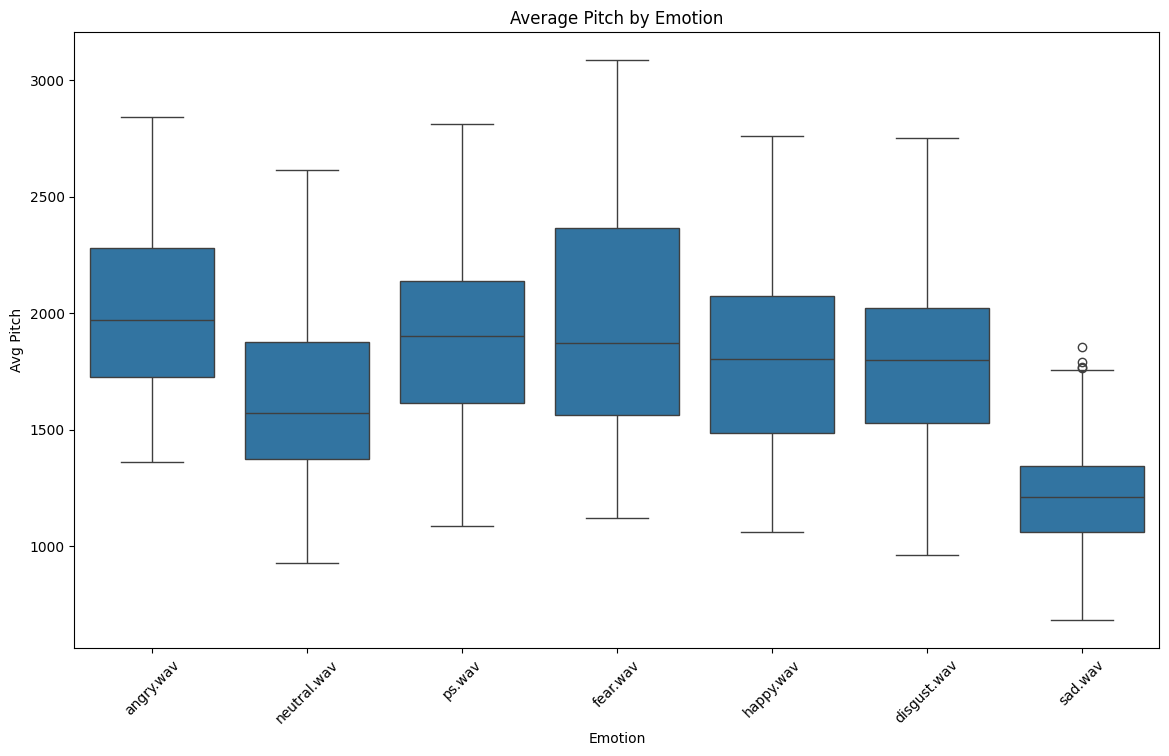

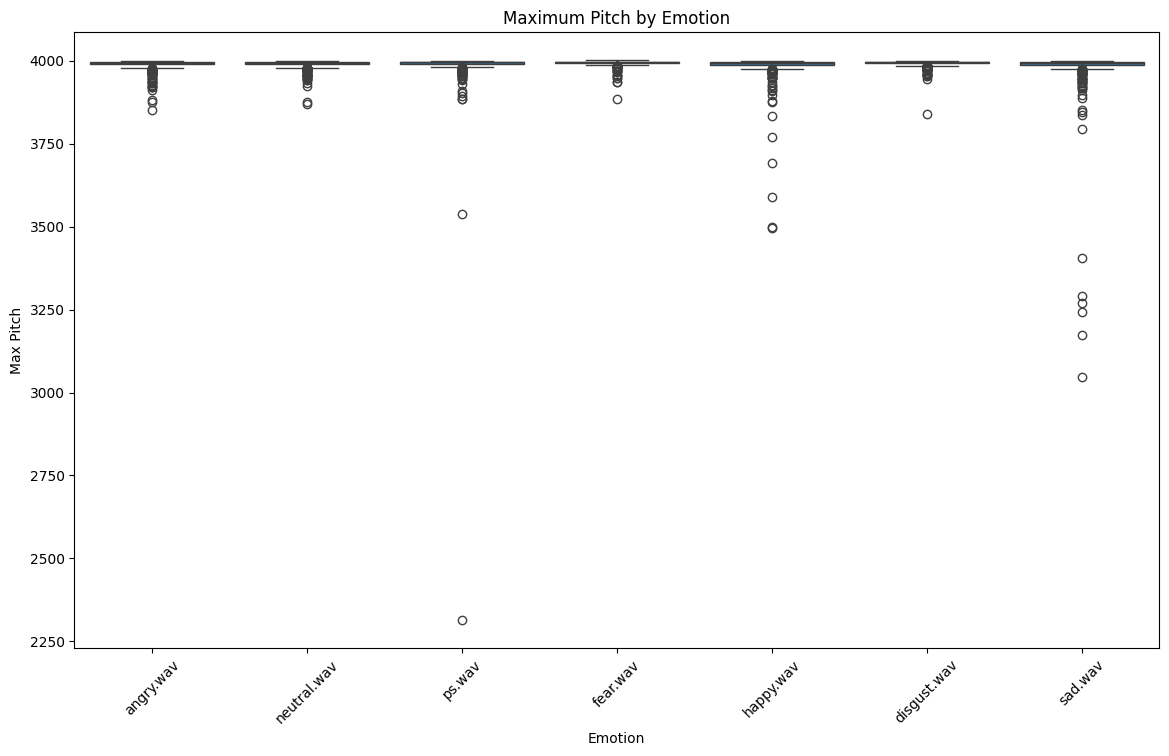

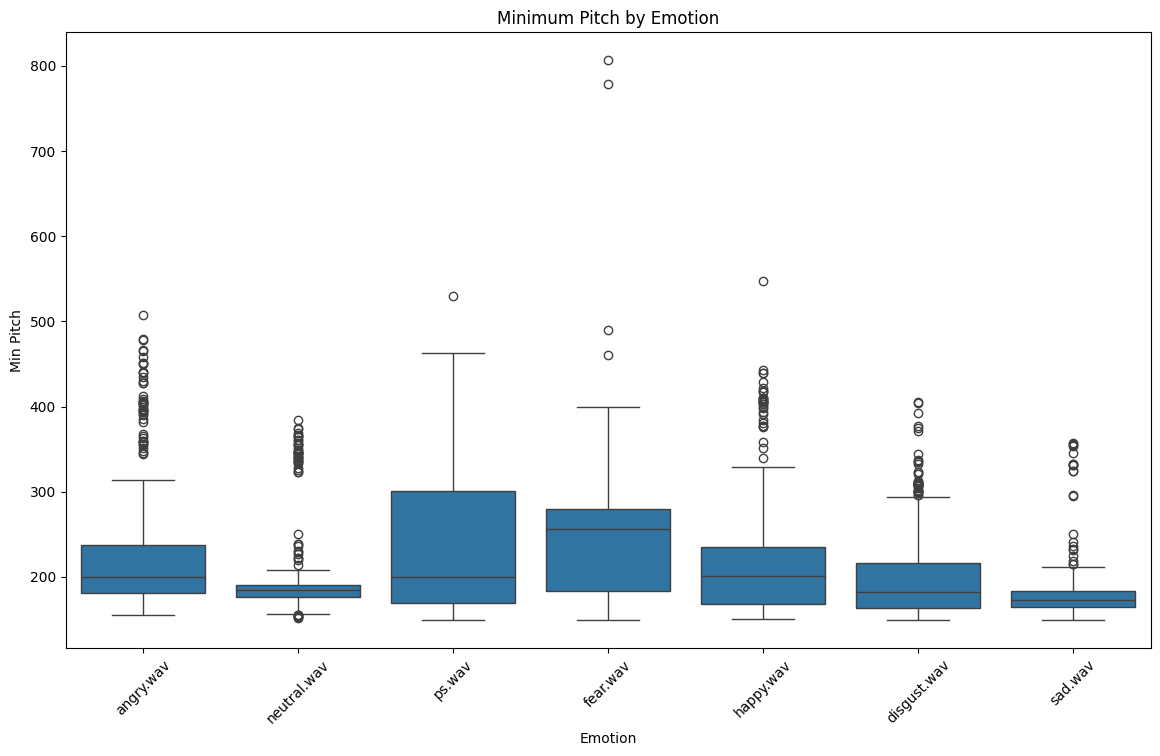

In [63]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Emotion', y='Avg_Pitch', data=features_df)
plt.title('Average Pitch by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Avg Pitch')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='Emotion', y='Max_Pitch', data=features_df)
plt.title('Maximum Pitch by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Max Pitch')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='Emotion', y='Min_Pitch', data=features_df)
plt.title('Minimum Pitch by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Min Pitch')
plt.xticks(rotation=45)
plt.show()


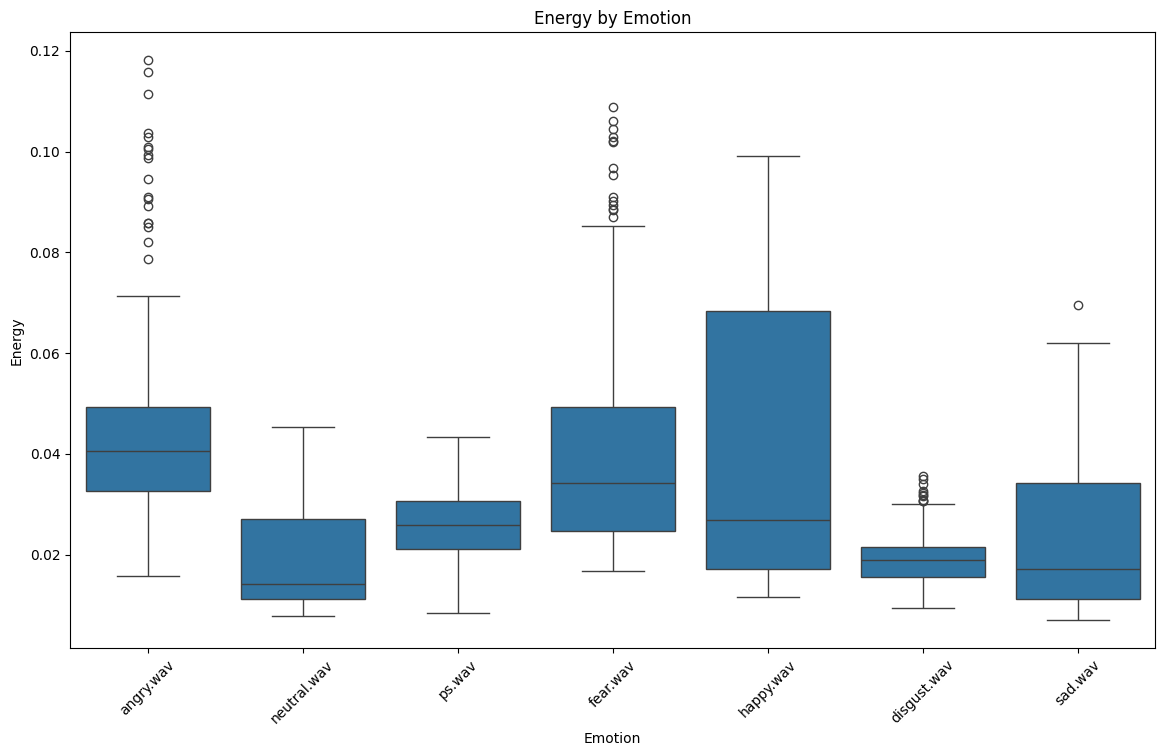

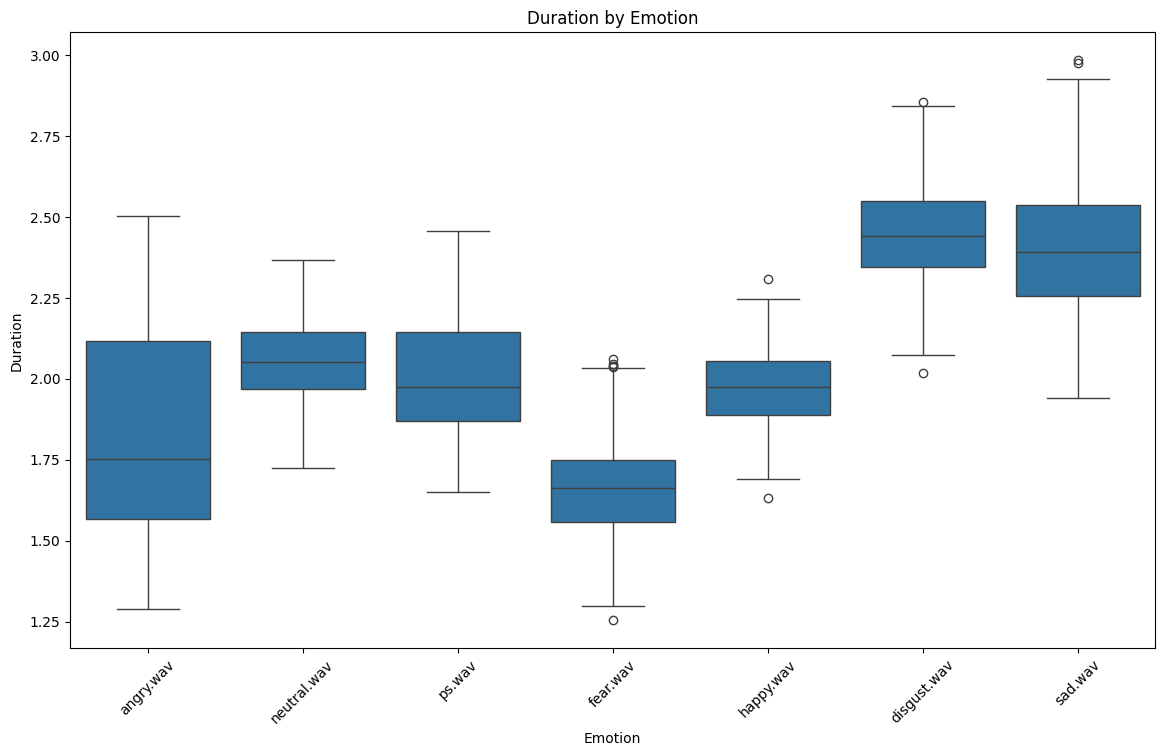

In [54]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Emotion', y='Energy', data=features_df)
plt.title('Energy by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Energy')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='Emotion', y='Duration', data=features_df)
plt.title('Duration by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Duration')
plt.xticks(rotation=45)
plt.show()
